In [1]:
import numpy as np
import pandas as pd
from os import path
#from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import csv

In [2]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    #text = translate(text,d)


    tokens = word_tokenize(text.lower())




    # Remove stop words
    stop_words=stopwords.words('english')
    #stop_words.extend(['all','one','two'])
    stop_words=list(set(stop_words)-set(['not']))
    filtered_tokens = [token for token in tokens if token not in stop_words ]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    #processed_text = re.sub(r"http\S+", "", processed_text)
    processed_text = re.sub(r"[^a-zA-Z0-9#]", " ", processed_text)

    #processed_text.apply(lambda x: ' '.join([w for w in x.split() if len(w)>=3]))

    #special=['â','œ','ð','ÿ','','']
    #for i in special:
     #   processed_text = processed_text.replace(i,"")
#A-Za-z
    return processed_text


In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahit\AppData\Roaming\nltk_data...


True

In [4]:
linkedin_scrape = pd.read_excel('../data/LinkedIn_Scrape.xlsx', sheet_name = 'PM Skills')

In [8]:
scrape1 = pd.read_csv('../data/requirements_sheet_jd.csv')
scrape2 = pd.read_csv('../data/requirements_sheet_jd_productthatcount1.csv')

In [11]:
scrape2['processed_terms'] = scrape2['terms'].apply(preprocess_text)
scrape1['processed_terms'] = scrape1['terms'].apply(preprocess_text)

In [14]:
scrape1.shape

(14, 7)

In [7]:
linkedin_scrape['Clean_Info']=linkedin_scrape['Info'].apply(preprocess_text)

In [18]:
scrape1

,Unnamed: 0,url,keyword,terms,error,access_date,processed_terms
0,2,https://jobs.lever.co/StubHubHoldings/9123d721...,We would like to see:,[<li>8+ years of product management experience...,NaN,2023-08-14 12:06:44.674818,li 8 year product management experience...
1,11,https://careers.google.com/jobs/results/879183...,Minimum qualifications:,[<li>Bachelor's degree or equivalent practical...,NaN,2023-08-14 12:06:51.765610,li bachelor s degree equivalent practic...
2,17,https://boards.greenhouse.io/robinhood/jobs/50...,What you bring:,"[<li>Bachelor’s or Master's Degree</li>, <li>4...",NaN,2023-08-14 12:07:08.884745,li bachelor master s degree li ...
3,18,https://boards.greenhouse.io/robinhood/jobs/50...,What you bring:,"[<li>Bachelor’s or Master's Degree</li>, <li>4...",NaN,2023-08-14 12:07:09.316111,li bachelor master s degree li ...
4,19,https://boards.greenhouse.io/notion/jobs/56566...,Skills You'll Need to Bring:,[<li>5 to 10 years of proven experience as a P...,NaN,2023-08-14 12:07:09.699667,li 5 10 year proven experience product m...
5,31,https://boards.greenhouse.io/materialize/jobs/...,About You:,"[<li style=""font-weight: 400;""><span style=""fo...",NaN,2023-08-14 12:07:32.647587,li style font weight 400 sp...
6,35,https://jobs.smartrecruiters.com/Square/743999...,Qualifications:,"[<li>Healthcare coverage (Medical, Vision and ...",NaN,2023-08-14 12:07:36.955688,li healthcare coverage medical visio...
7,39,https://boards.greenhouse.io/figma/jobs/490923...,We'd love to hear from you if you:,[<li>\n<p>Have deep user empathy and are able ...,NaN,2023-08-14 12:07:39.630702,li p deep user empathy able understa...
8,40,https://boards.greenhouse.io/figma/jobs/493303...,Qualifications:,"Figma offers equity to employees, as well a co...",NaN,2023-08-14 12:07:40.152992,figma offer equity employee well competitive...
9,43,https://boards.greenhouse.io/mavenclinic/jobs/...,Minimum qualifications:,"[<li>Bachelor's degree in a relevant field, or...",NaN,2023-08-14 12:07:41.632745,li bachelor s degree relevant field e...


In [22]:
df = linkedin_scrape[['Date Added', 'Company', 'Clean_Info']]
df.rename(columns = {'Company':'url', 'Date Added':'access_date', 'Clean_Info':'processed_terms' }, inplace=True)

C:\Users\sahit\AppData\Local\Temp\ipykernel_24932\2475014755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Company':'url', 'Date Added':'access_date', 'Clean_Info':'processed_terms' }, inplace=True)


In [26]:
df = pd.concat([df,scrape1[['url', 'access_date', 'processed_terms']], scrape2[['url', 'access_date', 'processed_terms']]])

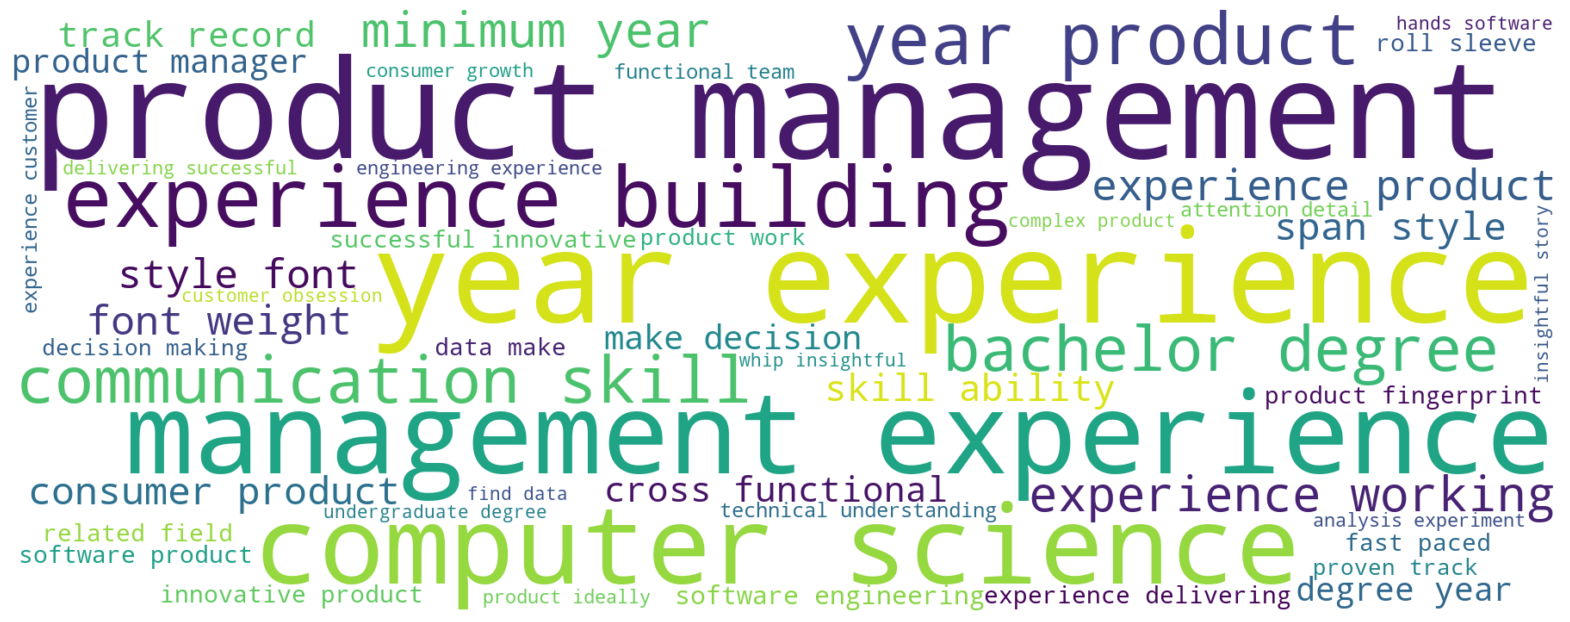

In [29]:
freq = pd.DataFrame()
#for i in range(3):
#l=len(asd)
#wdf = Filter_df[Filter_df['Clusters']==str(i)]
combined_text =" ".join(str(review) for review in df['processed_terms'])
#print(combined_text)
tokens = nltk.word_tokenize(combined_text)
single_freq=nltk.FreqDist(tokens)
double=nltk.ngrams(tokens,2)
double_freq=nltk.FreqDist(double)
freq=pd.concat([freq,pd.DataFrame.from_dict(single_freq.items())])
freq=pd.concat([freq,pd.DataFrame.from_dict(double_freq.items())])
#freq=freq.append(pd.DataFrame.from_dict(double_freq.items()))
#u=len(asd)
#asd.iloc[l:u,[2]]=i

pos_wordcloud = WordCloud(stopwords = STOPWORDS,collocation_threshold=3,min_word_length=4,include_numbers=False,width =1800,height=700,max_words = 50,background_color='white').generate(combined_text)

# Display the generated image:
plt.figure(figsize=(20,10)) 
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [31]:
freq.sort_values(by=1, ascending = False)

,0,1
1226,li,292
5,product,215
7,experience,214
3419,"(li, li)",142
35,data,77
...,...,...
1287,"(proactively, prevent)",1
1288,"(prevent, escalating)",1
1289,"(escalating, larger)",1
1290,"(larger, problem)",1


In [ ]:
freq.to_excel("../data/Freq_Ana.xlsx")